***
## Results for HDMC

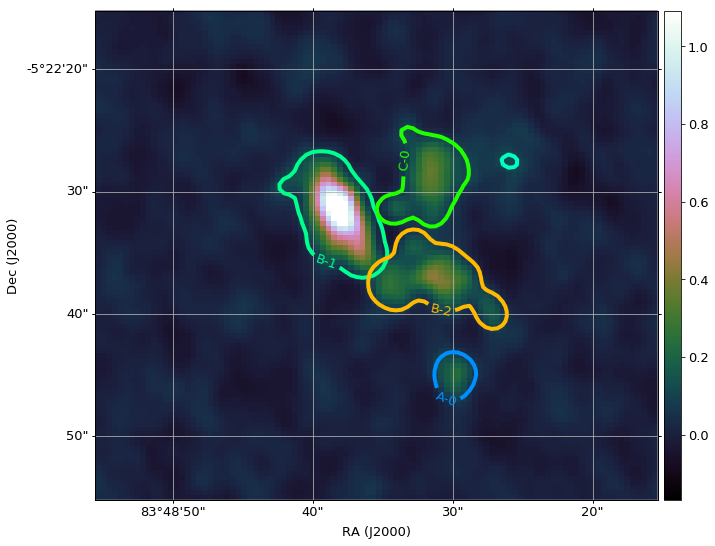

In [127]:
gp.ce_plot(hdmc, wcs=hdmc.wcs)

In [21]:
hdmc.compute_stats()

,Flux [Jy/Beam],Centroid Position,Centroid Position (ra-dec) [deg]
A-0,2.553549,"(0.25642992282199956, 0.6393462300840633)","(83.8125657537953, -5.37489614673424)"
B-1,86.000003,"(0.5849957513169202, 0.4339450696214322)","(83.80889889623643, -5.377178387466592)"
B-2,13.303998,"(0.4527963487514189, 0.5981267686000062)","(83.81037426932004, -5.375354146739297)"
C-0,15.568391,"(0.6626177587501095, 0.5979070071791625)","(83.8080326225777, -5.375356586290221)"
D-0,0.329211,"(0.6903420240211399, 0.7355856911445945)","(83.8077232197128, -5.373826822170189)"


***

## Comparison with `clumpfind` and `fellwalker`

In [124]:
from pycupid import clumpfind,fellwalker


def compute_caa_stats(data, caa, wcs):
    stats = {}

    for i in range(caa.min()+1, caa.max()+1):
        values = data[caa==i]
        xpos,ypos = np.where(caa==i)

        flux = np.sum(values)
        x_centroid = np.sum(xpos*values)/np.sum(values)
        y_centroid = np.sum(ypos*values)/np.sum(values)

        wx_centroid,wy_centroid = wcs.wcs_pix2world(x_centroid,y_centroid,0)

        stats["CE {0}".format(i)] = (flux, (x_centroid,y_centroid), (wx_centroid,wy_centroid))


    stats = pd.DataFrame.from_dict(stats, orient="index", columns=["Flux [Jy/Beam]", "Centroid Position [pix]", "Centroid Position (ra-dec) [deg]"])   

    display(stats)
    return stats


def caa_show(data, caa, save_path=None, wcs=None):
    bd_map = boundary_map_caa(caa).T
    colors = plt.cm.rainbow(np.linspace(0., 1., caa.max()))
    
    cmap = plt.cm.gray_r
    norm = plt.Normalize(data.min(), data.max())
    rgba = cmap(norm(data))
    
    m,n = data.shape
    for i in range(m):
        for j in range(n):
            if bd_map[i,j]==0: continue
            rgba[i,j,:] = colors[bd_map[i,j]-1]

    patches = []
    for i,color in enumerate(colors):
        colors[bd_map[i,j]-1]
        patches.append(mpatches.Patch(color=color, label='CE {0}'.format(i+1)))

    fig = plt.figure(figsize=(8,8))
    if wcs is not None: fig.gca(projection=wcs)
    im = plt.imshow(rgba)
    plt.grid()
    if wcs is not None:
        plt.xlabel(umap[wcs.axis_type_names[0]])
        plt.ylabel(umap[wcs.axis_type_names[1]])
    else:
        plt.tick_params(labelbottom=False, labelleft=False)
    ax = plt.gca()
    ax.invert_yaxis()
    if save_path is not None:
        plt.savefig(save_path, format='eps', dpi=150, bbox_inches='tight')
    #if wcs is not None:
        #cbar = plt.colorbar(im, ax=ax, pad=0.01, aspect=30)
    ax.set_aspect('auto')
    plt.legend(handles=patches)
    plt.show()

***
### `clumpfind`

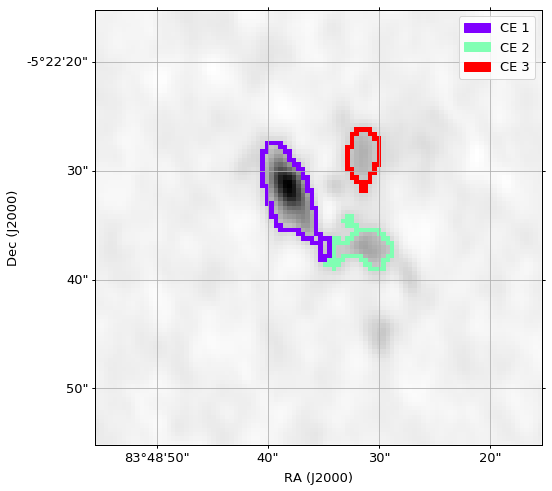

In [125]:
#out_cf = clumpfind(data, 0.5*base_level)
out_cf = clumpfind(data, 0.078)
out_cf[out_cf==out_cf.min()] = 0.

caa_show(data, out_cf, wcs=wcs)

In [126]:
compute_caa_stats(data, out_cf, wcs);

,Flux [Jy/Beam],Centroid Position [pix],Centroid Position (ra-dec) [deg]
CE 1,47.263725,"(45.102418348646694, 55.110800500659856)","(83.81033824649124, -5.375821021923468)"
CE 2,63.512123,"(58.75269896603537, 43.558794516594915)","(83.80881484605455, -5.377104577610403)"
CE 3,5.147349,"(60.02130581784532, 62.89499710792854)","(83.80867327066305, -5.374956110414155)"


***
### `Fellwalker`

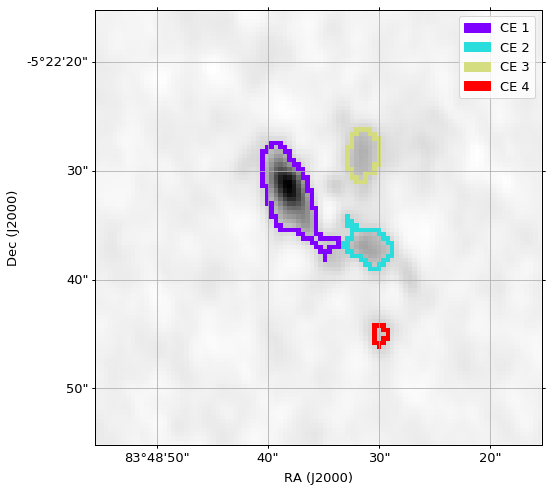

In [121]:
#out_fw = fellwalker(data, 0.5*base_level)
out_fw = fellwalker(data, 0.078)
out_fw[out_fw==out_fw.min()] = 0.

caa_show(data, out_fw, wcs=wcs)

In [122]:
compute_caa_stats(data, out_fw, wcs);

,Flux [Jy/Beam],Centroid Position [pix],Centroid Position (ra-dec) [deg]
CE 1,50.195412,"(45.665768954545506, 54.56304219068273)","(83.81027537549518, -5.375881884010656)"
CE 2,49.184555,"(60.03908211413193, 43.62341974234582)","(83.80867128285561, -5.3770973967846585)"
CE 3,4.008535,"(59.995116623768396, 63.916111878214366)","(83.80867619363268, -5.374842653222719)"
CE 4,-0.134510,"(64.38228471820102, 23.446268155351156)","(83.80818656590594, -5.379339301442377)"


***